# Case Study 07- Supervised Learning

In [22]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Read the dataset to the python environment.

In [23]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
#Dispaying last 5 datas from the dataset
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#Finding the shape of the dataset(number of rows and columns) using shape. 
data.shape

(150, 5)

In [5]:
#Finding the column names of our dataset
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
#Finding the datatypes of variables in our dataset
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
#Finding the presance of null values in our dataset using isna().sum() .
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Column SL has 7 missing values.
Column SW has 6  missing values.Column PL has 6 missing values

In [8]:
#Finding the summery for our dataset using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Finding statistical values for our dataset
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting Graphs

Text(0.5, 1.0, 'Scatter Plot For IRIS Dataset')

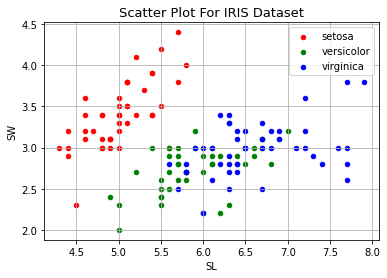

In [10]:
#Scatter plot  shows relationship between the sepal length and width
ax = data[data.Classification=='Iris-setosa'].plot.scatter(x='SL', y='SW', 
                                                    color='red', label='setosa')
data[data.Classification=='Iris-versicolor'].plot.scatter(x='SL', y='SW', 
                                                color='green', label='versicolor', ax=ax)
data[data.Classification=='Iris-virginica'].plot.scatter(x='SL', y='SW', 
                                                color='blue', label='virginica', ax=ax)
plt.grid()
plt.title("Scatter Plot For IRIS Dataset",fontsize = 13)

Text(0.5, 1.0, 'Scatter Plot For IRIS Dataset')

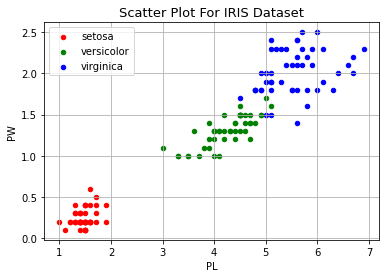

In [11]:
#Scatter plot  shows relationship between the petal length and width
ax = data[data.Classification=='Iris-setosa'].plot.scatter(x='PL', y='PW', 
                                                    color='red', label='setosa')
data[data.Classification=='Iris-versicolor'].plot.scatter(x='PL', y='PW', 
                                                color='green', label='versicolor', ax=ax)
data[data.Classification=='Iris-virginica'].plot.scatter(x='PL', y='PW', 
                                                color='blue', label='virginica', ax=ax)
plt.grid()
plt.title("Scatter Plot For IRIS Dataset",fontsize = 13)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

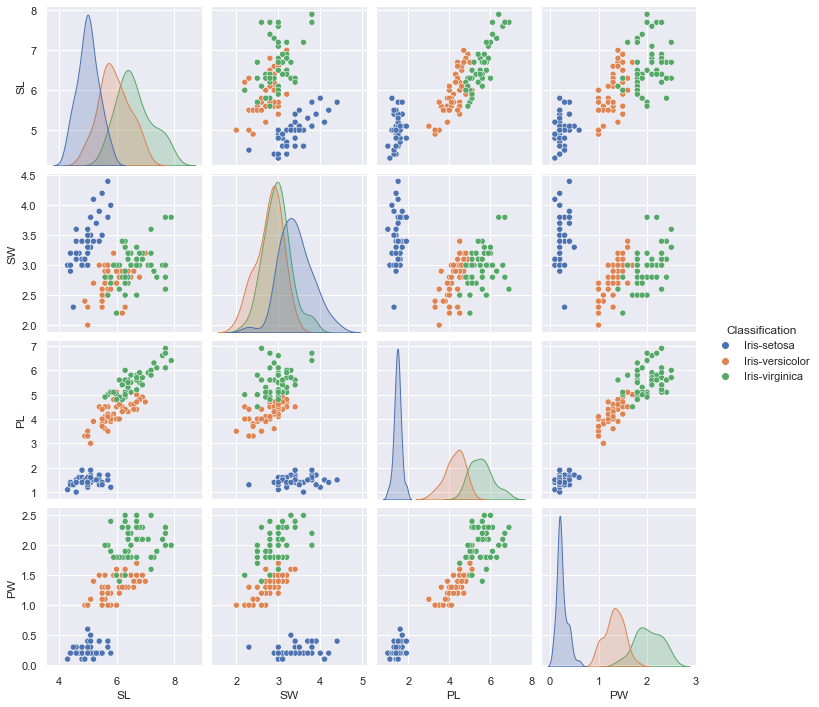

In [12]:
# Paired plot using seaborn
sns.set()
sns.pairplot(data[['SL', 'SW', 'PL', 'PW', 'Classification']],
             hue="Classification", diag_kind="kde")

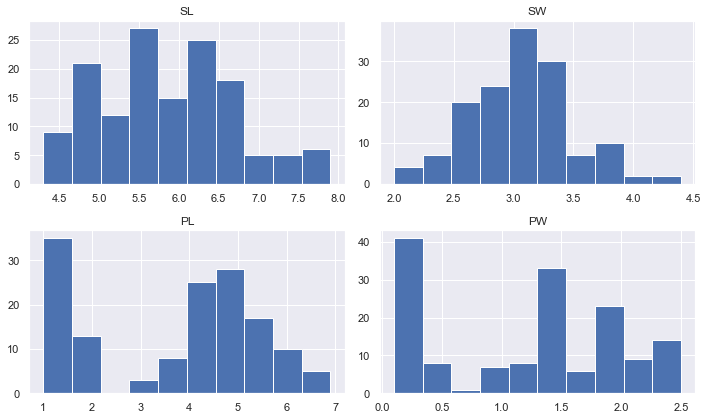

In [13]:
#Freq distribution graph
fgraph=data.select_dtypes(include=['float'])
fgraph.hist(figsize=(10,6))
plt.tight_layout()

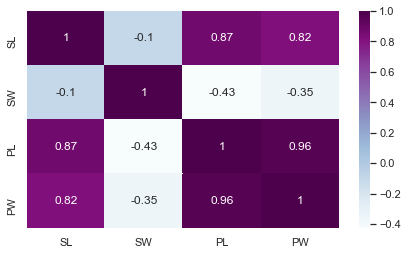

In [14]:
#Heatmap with input as the correlation matrix calculted by(data.corr())
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

## 2. Do necessary pre-processing steps.

### Fill in all the missing values present in all the columns in the dataset

In [15]:
#Checking datatypes of the data
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [16]:
#Checking missing/null values using isna()
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

SL has 7,SW has 6 and PL has 6 Missing values

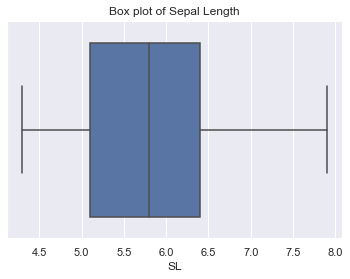

In [17]:
#Plotting boxplot to check the presence of outliers 
sns.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')
plt.show()

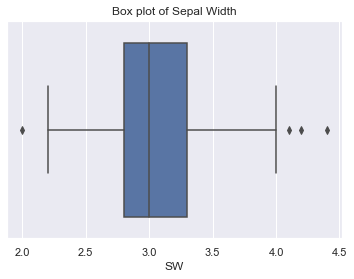

In [18]:
#Box plot for SW
sns.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')
plt.show()

We can see that outiers present in Sepal Width (SW)

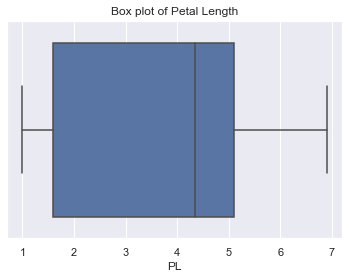

In [19]:
#Box plot for PL
sns.boxplot(data['PL'])
plt.title('Box plot of Petal Length')
plt.show()

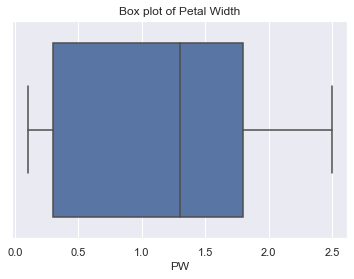

In [20]:
#Box plot for PW
sns.boxplot(data['PW'])
plt.title('Box plot of Petal Width')
plt.show()

In [25]:
## Filling Null values with median()
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [26]:
#Checking null values again
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now we can see that no null values in our dataset

### Outliers Handling

From the above boxplot we know that SW(SEPAL WIDTH) include outliers so we will handle it using IQR

In [27]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [28]:
print('Q1=',Q1)
print('Q3=',Q3)

Q1= 2.8
Q3= 3.25


In [29]:
IQR = Q3-Q1
print('IQR=',IQR)

IQR= 0.4500000000000002


In [30]:
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('high_limit',high_limit)

low_limit= 2.1249999999999996
high_limit 3.9250000000000003


In [35]:
#Finding the index of the outliers and we can drop those outliers 
index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='SW'>

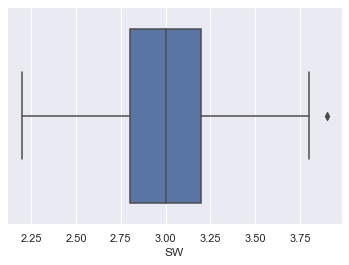

In [36]:
sns.boxplot(x=data['SW'])

We can see that now the outliers are managed now

In [42]:
data.shape

(145, 5)

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [38]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [44]:
#Splittng dataset.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (108, 4)
x_test shape: (37, 4)
y_train shape: (108,)
y_test shape: (37,)


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logic = LogisticRegression(multi_class = 'multinomial')
model = logic.fit(x_train, y_train)
prediction = model.predict(x_test)

In [48]:
print('Accuracy Score ', accuracy_score(y_test, prediction))

Accuracy Score  0.8918918918918919


In [49]:
confusion_matrix(y_test, prediction)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

Logistic Regression gives a model of accuracy 0.891

### kNN

In [60]:
#loading the ibrary
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(2,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [61]:
acc_values

[0.8918918918918919,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919]

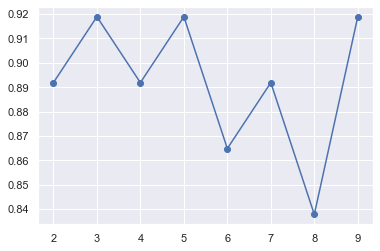

In [62]:
plt.plot(neighbors, acc_values, 'o-')

In [63]:
#Select k=
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [64]:
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.918918918918919


In [65]:
confusion_matrix(y_test, y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

Logistic Regression gives a model of accuracy 0.91 and 2 miss classification

### Decision Tree Algorithm

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.918918918918919


In [69]:
confusion_matrix(y_test, prediction)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

Logistic Regression gives a model of accuracy 0.91 and 3 miss classification

### Support Vector Machine

In [70]:
#Linear svm
from sklearn.svm import SVC
svm_l = SVC(kernel='linear')
svm_l.fit(x_train, y_train)
y_pred = svm_l.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is 0.918918918918919


array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [72]:
#Polynomial svp
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred_p))
confusion_matrix(y_test, y_pred)

Accuracy is 0.9459459459459459


array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]], dtype=int64)

In [73]:
#Radial SVM
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train, y_train)
y_pred = svm_radial.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is 0.8648648648648649


array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [77]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is 0.9459459459459459


array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

Random Forest Classifier gives a model of accuracy 0.94 and has 2 misclassifications.

From the above classification models, Support Vector Machine with polynomial kernel of degree 3 gives the highest accuracy and lowest misclassifications.